In [1]:
from tools import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

d = manual_load_data('clean_data.pkl')

In [2]:
# Define a function that returns coordinates of a straight line connecting two points in 3d

def get_3d_line(vec_x, vec_y, vec_z):
        
    x0 = vec_x[0]; x1 = vec_x[-1]
    y0 = vec_y[0]; y1 = vec_y[-1]
    z0 = vec_z[0]; z1 = vec_z[-1]
    
    a = x1 - x0
    b = y1 - y0
    c = z1 - z0
   
    t = np.linspace(0, 1, len(vec_x))
    xs = np.array(x0 + t*a)
    ys = np.array(y0 + t*b)
    zs = np.array(z0 + t*c)
    
    return (xs, ys, zs)

In [3]:
tr = d['P11']['trials']['t16']
ro = np.where(np.array(tr['startmovement']) == 1)[0][0]
print ro

x = tr['wrist11x'][ro:]
y = tr['wrist11y'][ro:]
z = tr['wrist11z'][ro:]

linex, liney, linez = get_3d_line(x, y, z)

print linex[0] == x[0]
print linex[-1] == x[-1]

918
True
True


In [12]:
%matplotlib qt

fig = plt.figure()

ax1 = fig.add_subplot(121, projection = '3d')

ax1.plot(x, y, z, 'r.-', linewidth = 0.5)
ax1.plot(linex, liney, linez, 'b.-')

for i in range(len(x)):
    ax1.plot([x[i], linex[i]],
            [y[i], liney[i]],
            [z[i], linez[i]], 'g-', linewidth = 0.3)

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')
# ax1.set_title(tr['name'])
ax1.set_facecolor([0.98, 0.98, 0.98])

ax2 = fig.add_subplot(322)
ax2.plot(x, 'r.-', linewidth = 0.5)
ax2.plot(linex, 'b.-', linewidth = 0.5)
for i in range(len(x)):
    ax2.plot([i, i], [x[i], linex[i]], 'g-', linewidth = 0.3)
ax2.set_title('x axis')


ax3 = fig.add_subplot(324)
ax3.plot(y, 'r.-', linewidth = 0.5)
ax3.plot(liney, 'b.-', linewidth = 0.5)
for i in range(len(x)):
    ax3.plot([i, i], [y[i], liney[i]], 'g-', linewidth = 0.3)
ax3.set_title('y axis')


ax4 = fig.add_subplot(326)
ax4.plot(z, 'r.-', linewidth = 0.5)
ax4.plot(linez, 'b.-', linewidth = 0.5)
for i in range(len(x)):
    ax4.plot([i, i], [z[i], linez[i]], 'g-', linewidth = 0.3)
ax4.set_title('z axis')

plt.suptitle(tr['name'])
plt.tight_layout()
plt.show()

# Working method

In [13]:
# Reference:
# https://www.youtube.com/watch?v=0lG53-ogF2k

def get_intercept(p0, p1, q):
    
    p0 = np.array(p0); p1 = np.array(p1); q = np.array(q)
    
    v = np.array(p1 - p0) # direction of the sraight line
    pq = np.array(p0 - q) # point on the direction vector for the given point
    
    t = -np.sum(v * pq) / np.sum(v**2) # this t moves the intercept btw straight & perp where they are pi/2   
    intercept = p0 + t * v
    
    error = np.dot(v, intercept - q)
#     print error
    
    return intercept

In [40]:
px, py, pz = get_intercept([x[0], y[0], z[0]], [x[-1], y[-1], z[-1]], [x[60], y[60], z[60]])

In [19]:
xs = np.array([])
ys = np.array([])
zs = np.array([])

first = [x[0], y[0], z[0]]
last = [x[-1], y[-1], z[-1]]

for i in range(len(x)):
    px, py, pz = get_intercept(first, last, [ x[i], y[i], z[i] ])
    xs = np.append(xs, px)
    ys = np.append(ys, py)
    zs = np.append(zs, pz)

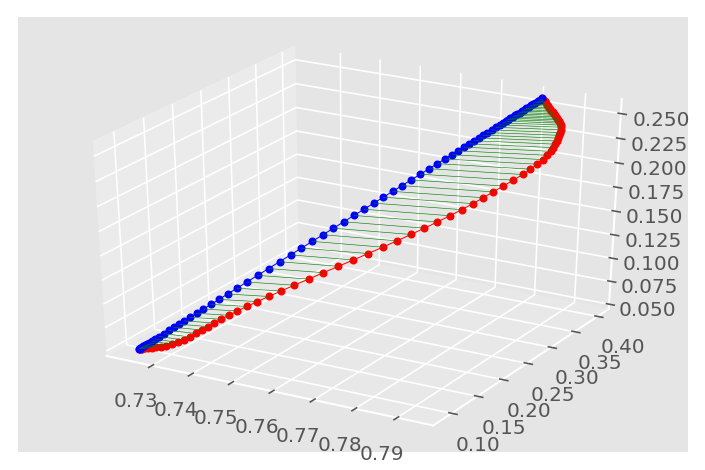

In [65]:
%matplotlib qt

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.plot(x, y, z, 'r.-', linewidth = 0.5)
# ax.plot(linex, liney, linez, 'b-', linewidth = 0.5)
ax.plot(xs, ys, zs, 'b.-', linewidth = 0.5)
for i in range(len(x)):
    ax.plot([x[i], xs[i]], [y[i], ys[i]], [z[i], zs[i]], 'g-', linewidth = 0.3)


plt.show()

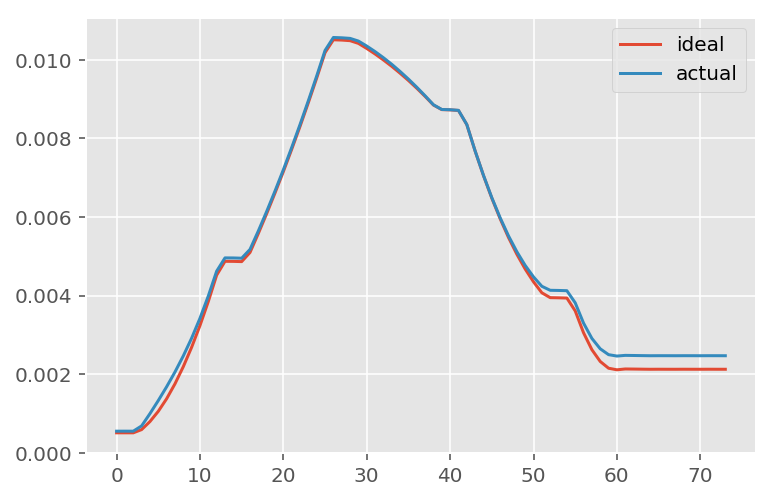

In [63]:
% matplotlib inline

vel1 = np.sqrt(np.diff(xs)**2 + np.diff(ys)**2 + np.diff(zs)**2)
vel2 = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
plt.plot(vel1, label = 'ideal')
plt.plot(vel2, label = 'actual')
plt.legend()
plt.show()

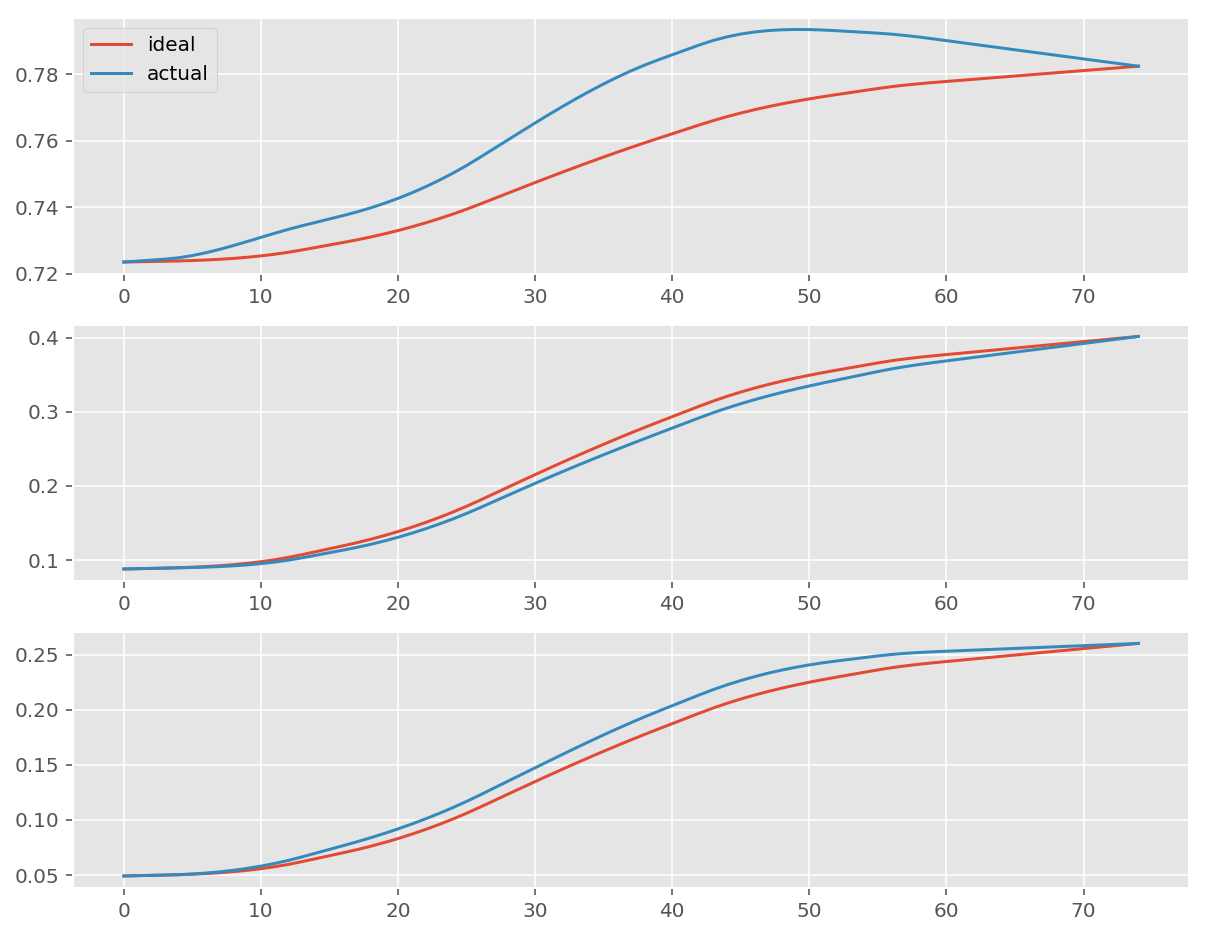

In [62]:
%matplotlib inline

fig = plt.figure(figsize = [10, 8])

ax1 = fig.add_subplot(311)
ax1.plot(xs, '-', label = 'ideal')
ax1.plot(x, '-', label = 'actual')

ax2 = fig.add_subplot(312)
ax2.plot(ys, '-', label = 'ideal')
ax2.plot(y, '-', label = 'actual')

ax3 = fig.add_subplot(313)
ax3.plot(zs, '-', label = 'ideal')
ax3.plot(z, '-', label = 'actual')

ax1.legend()
plt.show()

# Other stuff

In [4]:
def get_intersect(l0, l1, p):
    l0x = l0[0]; l0y = l0[1]; l0z = l0[2]
    l1x = l1[0]; l1y = l1[1]; l1z = l1[2]
    px = p[0]; py = p[1]; pz = p[2]
    
    u = (px - l0x) * (l1x - l0x) + (py - l0y) * (l1y - l0y) + (pz - l0z) * (l1z - l0z)
    print u
    a = [ px  - l0x, py  - l0y, pz  - l0z ]
    b = [ l1x - l0x, l1y - l0y, l1z - l0z ]
    print np.dot(a, b)
    dist = np.sqrt( (l1x - l0x)**2 + (l1y - l0y)**2 + (l1z - l0z)**2 )
    u = u / (dist**2)
    
    tx = l0x + u * (l1x - l0x)
    ty = l0y + u * (l1y - l0y)
    tz = l0z + u * (l1z - l0z)
    
    return (tx, ty, tz)

In [5]:
px, py, pz = get_intersect([x[0], y[0], z[0]], [x[-1], y[-1], z[-1]], [x[60], y[60], z[60]])

0.135062013415
0.135062013415


In [18]:
# https://arstechnica.com/civis/viewtopic.php?f=26&t=149128
# http://www.math.ucla.edu/~ronmiech/Calculus_Problems/32A/chap11/section5/717d57/717_57.html
# http://people.math.sc.edu/filaseta/courses/Math241/Math241Quiz4Fall2013Sols.pdf
      
x0 = x[0]; x1 = x[-1]
y0 = y[0]; y1 = y[-1]
z0 = z[0]; z1 = z[-1]

a = x1 - x0
b = y1 - y0
c = z1 - z0

t = np.linspace(0, 1, 100)
xs = np.array(x[30] + t*a)
ys = np.array(y[30] + t*b)
zs = np.array(z[30] + t*c)


In [13]:
xs

array([-0.70654   , -0.70631037, -0.70608074, ...,  1.58906274,
        1.58929237,  1.589522  ])

In [37]:
%matplotlib qt

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.plot(x, y, z, 'r-')
ax.plot(linex, liney, linez, 'b-')

ax.scatter(x[30], y[30], z[30], 'r.')
ax.plot(xs, ys, zs, 'g-')

plt.show()

In [32]:
xp = np.diff(x)
yp = np.diff(y)
zp = np.diff(z)

lx = linex[1:] + linex[0] * xp
ly = liney[1:] + linex[0] * yp
lz = linez[1:] + linex[0] * zp

In [36]:
%matplotlib qt

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.plot(x, y, z, 'r.-', linewidth = 0.5)
ax.plot(lx, ly, lz, 'b.-', linewidth = 0.5)

for i in range(len(xp)):
    ax.plot([x[i], lx[i]],
            [y[i], ly[i]],
            [z[i], lz[i]], 'g-', linewidth = 0.3)

plt.show()

In [19]:
# https://math.stackexchange.com/questions/621868/determine-if-two-straight-lines-given-by-parametric-equations-intersect
# https://math.stackexchange.com/questions/270767/find-intersection-of-two-3d-lines

x0 = x[0]; x1 = x[-1]
y0 = y[0]; y1 = y[-1]
z0 = z[0]; z1 = z[-1]

a = x1 - x0
b = y1 - y0
c = z1 - z0

v = np.array([a, b, c]) # direction vector of the straight line
p = np.array([x0, y0, z0]) # point on the straight line (initial point, the intercept btw line & curve)

q = np.array([x[60], y[60], z[60]]) # point on the curve

PQ = q - p
# PQ = p - q

v1 = np.cross(PQ, v)
v2 = np.cross(v1, v)

print v2

t = np.linspace(0, 10, 2)

xline = q[0] + v2[0] * t
yline = q[1] + v2[1] * t
zline = q[2] + v2[2] * t

# xline1 = x0 + a * t
# yline1 = y0 + b * t
# zline1 = z0 + c * t


print np.dot(v2, v)

[-0.00179585  0.00125669 -0.00136844]
-5.42101086243e-20


In [20]:
p0 = np.array([x[0], y[0], z[0]]) # point on the straight line
p1 = np.array([x[-1], y[-1], z[-1]])
v = np.array(p1 - p0) # direction of the straight line

a0 = np.array([x[60], y[60], z[60]])
va = p0 - a0 # point on a direction vector for the perpendicular line

# p0 = np.array([4.0, 2.0, 4.0]) # point on the straight line
# v = np.array([1.0, 3.0, 5.0]) # direction of the straight line

# a0 = np.array([1.0, 1.0, 2.0]) # the given point
# va = p0 - a0 # point on a direction vector for the perpendicular line

t = -np.sum(v * va) / np.sum(v**2)
print t

thepoint = p0 + t * v
print thepoint

0.922140104577
[ 0.77780575  0.37727909  0.24364994]
